In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [3]:
df = pd.read_csv('gold_posneg_2.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df

,High,Low,High/Close,Low/Close,Spread,Spread Change,Volume,Volume Diff,Volume change,Return ewm,...,Gold Close,gld Return,CAD Close,Cad Return,TSX Close,Tsx Return,Return,Bar Close,Day of the Week,Pos
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,36.457437,35.661909,0.003296,-0.018597,0.795529,-0.031249,2996000,-74100.0,-0.024136,0.009505,...,1118.099976,0.000358,1.03950,-0.001441,11888.099609,0.001786,0.009505,36.337681,1,1
2010-01-06,37.424048,36.465993,0.013201,-0.012737,0.958055,0.204300,2944700,-51300.0,-0.017123,0.014154,...,1135.900024,0.015920,1.03190,-0.007311,11944.500000,0.002772,0.016478,36.936466,2,0
2010-01-07,36.782484,36.226468,0.008443,-0.006801,0.556016,-0.419641,2420100,-524600.0,-0.178151,-0.003619,...,1133.099976,-0.002465,1.03400,0.002035,11887.500000,0.000258,-0.012506,36.474537,3,1
2010-01-08,36.842383,36.089624,0.007721,-0.012869,0.752759,0.353845,2648000,227900.0,0.094170,0.000357,...,1138.199951,0.004501,1.02980,-0.004062,11953.799805,0.002031,0.002346,36.560101,4,1
2010-01-11,37.637908,36.534432,0.023256,-0.006744,1.103476,0.465908,2363100,-284900.0,-0.107591,0.004175,...,1150.699951,0.010982,1.03380,0.003884,11947.099609,0.001167,0.006083,36.782501,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,30.389999,29.940001,0.014691,-0.000334,0.449999,-0.274196,3180400,-1345000.0,-0.297211,-0.002230,...,1853.599976,0.005806,1.27077,-0.004988,17934.699219,0.000252,0.000000,29.950001,2,0
2021-01-14,30.320000,29.760000,0.013708,-0.005015,0.559999,0.244446,3226400,46000.0,0.014464,-0.001634,...,1850.300049,-0.001780,1.26981,-0.000755,17958.099609,0.000603,-0.001336,29.910000,3,0
2021-01-15,30.160000,29.430000,0.023761,-0.001018,0.730000,0.303572,3259100,32700.0,0.010135,-0.010575,...,1829.300049,-0.011350,1.26477,-0.003969,17909.000000,-0.000509,-0.015045,29.459999,4,1


In [4]:
df.columns

Index(['High', 'Low', 'High/Close', 'Low/Close', 'Spread', 'Spread Change',
       'Volume', 'Volume Diff', 'Volume change', 'Return ewm', 'Oil Close',
       'Oil Return', 'Gold Close', 'gld Return', 'CAD Close', 'Cad Return',
       'TSX Close', 'Tsx Return', 'Return', 'Bar Close', 'Day of the Week',
       'Pos'],
      dtype='object')

In [5]:
df_input = df[['High/Close', 'Low/Close', 'Spread', 'Spread Change',
       'Volume', 'Volume Diff', 'Volume change', 'Return ewm', 'Oil Close',
       'Oil Return', 'Gold Close', 'gld Return', 'CAD Close', 'Cad Return',
       'TSX Close', 'Tsx Return', 'Return']]
df_input

,High/Close,Low/Close,Spread,Spread Change,Volume,Volume Diff,Volume change,Return ewm,Oil Close,Oil Return,Gold Close,gld Return,CAD Close,Cad Return,TSX Close,Tsx Return,Return
Date,,,,,,,,,,,,,,,,,
2010-01-05,0.003296,-0.018597,0.795529,-0.031249,2996000,-74100.0,-0.024136,0.009505,81.769997,0.003190,1118.099976,0.000358,1.03950,-0.001441,11888.099609,0.001786,0.009505
2010-01-06,0.013201,-0.012737,0.958055,0.204300,2944700,-51300.0,-0.017123,0.014154,83.180000,0.017244,1135.900024,0.015920,1.03190,-0.007311,11944.500000,0.002772,0.016478
2010-01-07,0.008443,-0.006801,0.556016,-0.419641,2420100,-524600.0,-0.178151,-0.003619,82.660004,-0.006251,1133.099976,-0.002465,1.03400,0.002035,11887.500000,0.000258,-0.012506
2010-01-08,0.007721,-0.012869,0.752759,0.353845,2648000,227900.0,0.094170,0.000357,82.750000,0.001089,1138.199951,0.004501,1.02980,-0.004062,11953.799805,0.002031,0.002346
2010-01-11,0.023256,-0.006744,1.103476,0.465908,2363100,-284900.0,-0.107591,0.004175,82.519997,-0.002779,1150.699951,0.010982,1.03380,0.003884,11947.099609,0.001167,0.006083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-13,0.014691,-0.000334,0.449999,-0.274196,3180400,-1345000.0,-0.297211,-0.002230,52.910000,-0.005638,1853.599976,0.005806,1.27077,-0.004988,17934.699219,0.000252,0.000000
2021-01-14,0.013708,-0.005015,0.559999,0.244446,3226400,46000.0,0.014464,-0.001634,53.570000,0.012474,1850.300049,-0.001780,1.26981,-0.000755,17958.099609,0.000603,-0.001336
2021-01-15,0.023761,-0.001018,0.730000,0.303572,3259100,32700.0,0.010135,-0.010575,52.360001,-0.022587,1829.300049,-0.011350,1.26477,-0.003969,17909.000000,-0.000509,-0.015045


In [6]:
y = df[["Pos"]]
y.head()

,Pos
Date,
2010-01-05,1
2010-01-06,0
2010-01-07,1
2010-01-08,1
2010-01-11,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_input, y, test_size=0.3, random_state=42)

In [8]:
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()


x_train_scaler.fit(x_train)
x_test_scaler.fit(x_test)


x_train = x_train_scaler.transform(x_train)
x_test = x_test_scaler.transform(x_test)

enc = OneHotEncoder()
enc.fit(y_train)

encoded_y_train = enc.transform(y_train).toarray()
encoded_y_test = enc.transform(y_test).toarray()
encoded_y_train[0]

array([0., 1.])

In [9]:
batch = 44
features = x_test.shape[1]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout 

In [11]:
units = 64
drop = 0.2

nn = Sequential()

nn.add(Dense(units=units, input_dim=features, activation="relu"))

nn.add(Dense(2, activation="softmax"))

In [12]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1152      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
class ThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_loss = logs["val_accuracy"]
        if val_loss > self.threshold:
            self.model.stop_training = True

In [15]:
earlystop = ThresholdCallback(threshold=0.57478)

model = nn.fit(x_train, encoded_y_train, validation_data=(x_test, encoded_y_test), callbacks=[earlystop], epochs=500, shuffle=True)

Train on 1886 samples, validate on 809 samples
Epoch 1/500
1886/1886 [==============================] - 1s 507us/sample - loss: 0.6986 - accuracy: 0.4958 - val_loss: 0.7004 - val_accuracy: 0.4697
Epoch 2/500
1886/1886 [==============================] - 0s 69us/sample - loss: 0.6943 - accuracy: 0.5175 - val_loss: 0.6966 - val_accuracy: 0.4944
Epoch 3/500
1886/1886 [==============================] - 0s 67us/sample - loss: 0.6924 - accuracy: 0.5196 - val_loss: 0.6960 - val_accuracy: 0.4759
Epoch 4/500
1886/1886 [==============================] - 0s 69us/sample - loss: 0.6926 - accuracy: 0.5122 - val_loss: 0.6935 - val_accuracy: 0.5278
Epoch 5/500
1886/1886 [==============================] - 0s 81us/sample - loss: 0.6903 - accuracy: 0.5329 - val_loss: 0.6944 - val_accuracy: 0.4932
Epoch 6/500
1886/1886 [==============================] - 0s 68us/sample - loss: 0.6899 - accuracy: 0.5376 - val_loss: 0.6912 - val_accuracy: 0.5328
Epoch 7/500
1886/1886 [==============================] - 0s 68us

In [16]:
model_loss, model_accuracy = nn.evaluate(x_test, encoded_y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

809/1 - 0s - loss: 0.6762 - accuracy: 0.5748
Normal Neural Network - Loss: 0.6845171097919289, Accuracy: 0.5747836828231812


In [17]:
predicted = nn.predict(x_test)
predicted = enc.inverse_transform(predicted).flatten().tolist()
results = pd.DataFrame({
    "Actual": y_test.Pos.values,
    "Predicted": predicted
})
results.head()

,Actual,Predicted
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1


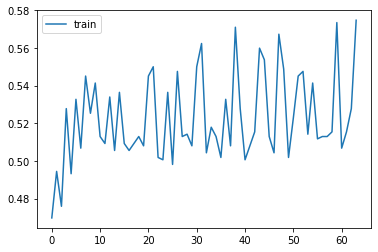

In [18]:
plt.plot(model.history["val_accuracy"])
plt.legend(["train", "test"])
plt.show()

In [19]:
max(model.history["val_accuracy"])

0.5747837

In [21]:
from sklearn.metrics import classification_report
print(classification_report(results.Actual, results.Predicted))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57       396
           1       0.58      0.58      0.58       413

    accuracy                           0.57       809
   macro avg       0.57      0.57      0.57       809
weighted avg       0.57      0.57      0.57       809



In [22]:
model_json = nn.to_json()
file_path = Path("bar_model_posneg.json")
with open(file_path, "w") as json_file:
    json_file.write(model_json)
    
file_path = "bar_weights_posneg.h5"
nn.save_weights(file_path)